In [13]:
import pandas as pd

df = pd.read_csv('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/dram_accesses_yolop.csv')
# df = pd.read_csv('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/dram_accesses_deeplabv3_resnet101.csv')
# df = pd.read_csv('/home/oq4116/projekte/ai-hardware-accelerators/mixed-precision-dnns/results/dram_accesses_deeplabv3_mobilenetv2.csv')

df

,Unnamed: 0,layer_idx,layer_type,w_reads,i_reads,o_reads,w_updates,i_updates,o_updates,w_fills,i_fills,o_fills,w_energy,i_energy,o_energy,total_dram_energy,bitwidth
0,0,0,QuantConv2d,3456,935088,0,0,0,2457600,0,0,0,200.0,200.0,200.0,679228800.0,16
1,1,1,QuantConv2d,18432,2475552,0,0,0,1228800,0,0,0,200.0,200.0,200.0,744556800.0,16
2,2,2,QuantConv2d,2048,1228800,0,0,0,614400,0,0,0,200.0,200.0,200.0,369049600.0,16
3,3,3,QuantConv2d,1024,614400,0,0,0,614400,0,0,0,200.0,200.0,200.0,245964800.0,16
4,4,4,QuantConv2d,9216,632448,0,0,0,614400,0,0,0,200.0,200.0,200.0,251212800.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,97,97,QuantConv2d,144,311696,0,0,0,307200,0,0,0,200.0,200.0,200.0,123808000.0,16
98,98,98,QuantConv2d,16,307200,0,0,0,307200,0,0,0,200.0,200.0,200.0,122883200.0,16
99,99,99,QuantConv2d,64,1228800,0,0,0,307200,0,0,0,200.0,200.0,200.0,307212800.0,16
100,100,100,QuantConv2d,64,614400,0,0,0,614400,0,0,0,200.0,200.0,200.0,245772800.0,16


## Sum up the total accesses for weights, inputs and outputs

In [14]:
accesses_w = df['w_updates'].sum() + df['w_reads'].sum() + df['w_fills'].sum()
accesses_i = df['i_updates'].sum() + df['i_reads'].sum() + df['i_fills'].sum()
accesses_o = df['o_updates'].sum() + df['o_reads'].sum() + df['o_fills'].sum()

In [15]:
accesses = accesses_i + accesses_o + accesses_w
print(f"Total accesses to DRAM: {accesses:,}")

Total accesses to DRAM: 139,709,032


In [16]:
transfers = accesses * 16/8
print(f"Total DRAM transfers: {transfers/1048576:,.4f} MB")

Total DRAM transfers: 266.4738 MB


In [17]:
energy = 0.0
for i, row in df.iterrows():
    energy += (row['w_updates'] + row['w_reads'] + row['w_fills']) * row['w_energy']
    energy += (row['i_updates'] + row['i_reads'] + row['i_fills']) * row['i_energy']
    energy += (row['o_updates'] + row['o_reads'] + row['o_fills']) * row['o_energy']
    
energy = energy / 1_000_000_000
print(f"Energy: {energy:,.2f}mJ")

Energy: 27.94mJ


<AxesSubplot: >

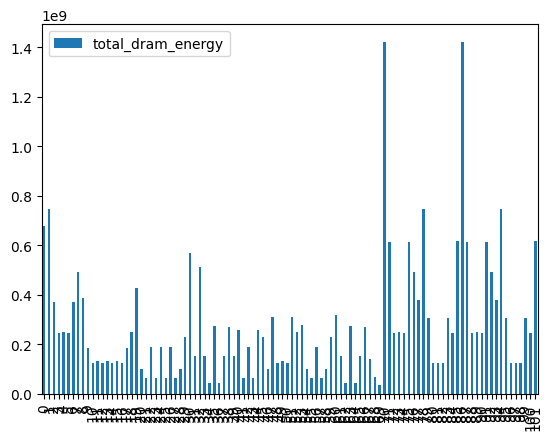

In [18]:
df.plot(kind='bar', y='total_dram_energy',  use_index=True)